In [1]:
import my_toolkit as tlk
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:

r = tlk.merge_indian_m_ret()
r.head()

,tcs,reliance,hdfc,ajanta,deepak,delta
Date,,,,,,
2010-10,0.135875,0.110408,-0.084138,-0.012628,0.071827,0.153163
2010-11,0.021940,-0.100935,0.002412,-0.133333,-0.038961,0.226718
2010-12,0.087449,0.074168,0.026669,0.026125,0.054054,-0.036150
2011-01,-0.005276,-0.131671,-0.127453,-0.027111,0.005898,-0.286451
2011-02,-0.039242,0.048896,0.002418,-0.045553,-0.010961,-0.151774


In [3]:
tlk.summary_stats(r)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown,Wealth
tcs,0.222554,0.229087,0.610051,3.413483,0.076926,0.091148,0.817919,-0.177523,7584.98
reliance,0.168989,0.543548,2.735659,22.791661,0.027344,0.238246,0.248235,-0.503941,4827.86
hdfc,0.187478,0.402897,3.949605,40.995648,-0.082406,0.168815,0.380010,-0.456858,5655.53
ajanta,0.515365,0.430456,1.225963,6.558206,0.105913,0.165320,1.097297,-0.561299,66102.31
deepak,0.625403,0.472559,1.547729,7.591989,0.095674,0.158798,1.226262,-0.310385,134026.23
delta,0.046212,0.590659,0.204889,5.033858,0.243670,0.345548,0.025861,-0.808946,1577.00


In [5]:
deepak = tlk.get_indian_m_ret(company="deepak")
ajanta = tlk.get_indian_m_ret(company="ajanta")
hdfc = tlk.get_indian_m_ret(company="hdfc")
da = pd.merge(left=deepak, right=ajanta, left_index=True, right_index=True)
dah = pd.merge(left=da, right=hdfc, left_index=True, right_index=True)
dahr = tlk.portfolio_return(weights=np.repeat(1/dah.shape[0], dah.shape[0]), returns=dah)

(<matplotlib.axes._subplots.AxesSubplot at 0x1e350e36bb0>,
      Returns  Volatility
 0   0.020136    0.116306
 1   0.021671    0.108661
 2   0.023207    0.101811
 3   0.024742    0.095927
 4   0.026278    0.091045
 5   0.027814    0.086793
 6   0.029349    0.083221
 7   0.030885    0.080419
 8   0.032420    0.078471
 9   0.033956    0.077439
 10  0.035492    0.077362
 11  0.037027    0.078241
 12  0.038563    0.080047
 13  0.040098    0.082717
 14  0.041634    0.086171
 15  0.043170    0.090320
 16  0.044705    0.095072
 17  0.046241    0.100567
 18  0.047776    0.114141
 19  0.049312    0.136416)

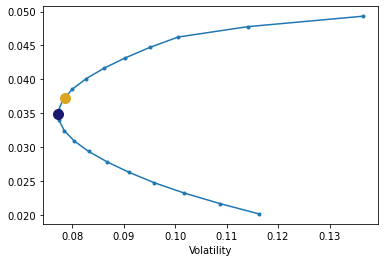

In [7]:
tlk.plot_ef(n_points=20, cov=dah.cov(), riskfree_rate=0.045, er=dahr, show_ew=True, show_gmv=True)

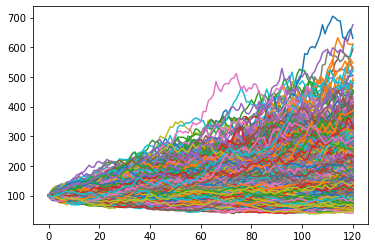

In [8]:
tlk.gbm().plot(legend = False)

In [9]:
inds = ['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other']
#inds=['Beer', 'Hlth', 'Fin','Rtail','Whlsl']
ind_rets = tlk.get_ind_returns(weighting="ew", n_inds=49)["2010":]
ind_mcap = tlk.get_ind_market_caps(49, weights=True)["2010":]

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown,Wealth
EW,0.075322,0.139008,-0.566519,3.923880,0.064106,0.089681,0.317160,-0.216976,1546.08
CW,0.076336,0.141111,-0.618953,4.018791,0.065553,0.091542,0.319421,-0.225660,1554.85


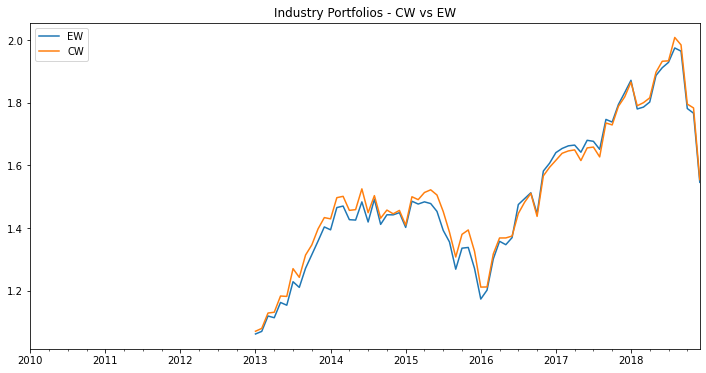

In [10]:
ewr = tlk.backtest_ws(ind_rets, estimation_window=36, weighting=tlk.weight_ew)
cwr = tlk.backtest_ws(ind_rets, estimation_window=36, weighting=tlk.weight_cw, cap_weights=ind_mcap)
btr = pd.DataFrame({"EW": ewr, "CW": cwr})
(1+btr).cumprod().plot(figsize=(12,6), title="Industry Portfolios - CW vs EW")
tlk.summary_stats(btr.dropna())

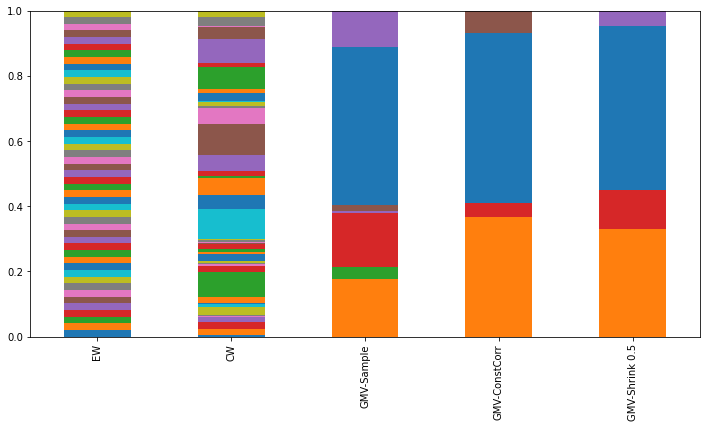

In [11]:
wts = pd.DataFrame({
    "EW": tlk.weight_ew(ind_rets["2010":]),
    "CW": tlk.weight_cw(ind_rets["2010":], cap_weights=ind_mcap),
    "GMV-Sample": tlk.weight_gmv(ind_rets["2010":], cov_estimator=tlk.sample_cov),
    "GMV-ConstCorr": tlk.weight_gmv(ind_rets["2010":], cov_estimator=tlk.cc_cov),
    "GMV-Shrink 0.5": tlk.weight_gmv(ind_rets["2010":], cov_estimator=tlk.shrinkage_cov),
})
wts.T.plot.bar(stacked=True, figsize=(12,6), legend=False);

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown,Wealth
EW,0.075322,0.139008,-0.566519,3.923880,0.064106,0.089681,0.317160,-0.216976,1546.08
CW,0.076336,0.141111,-0.618953,4.018791,0.065553,0.091542,0.319421,-0.225660,1554.85
GMV-Sample,0.161942,0.107330,-0.503624,3.800397,0.041310,0.059046,1.196468,-0.134348,2460.97
GMV-CC,0.100742,0.110365,-0.621449,3.618117,0.048470,0.067187,0.623752,-0.110357,1778.75
GMV-Shrink 0.5,0.130738,0.104997,-0.675699,3.999876,0.043677,0.063916,0.933746,-0.115142,2090.12


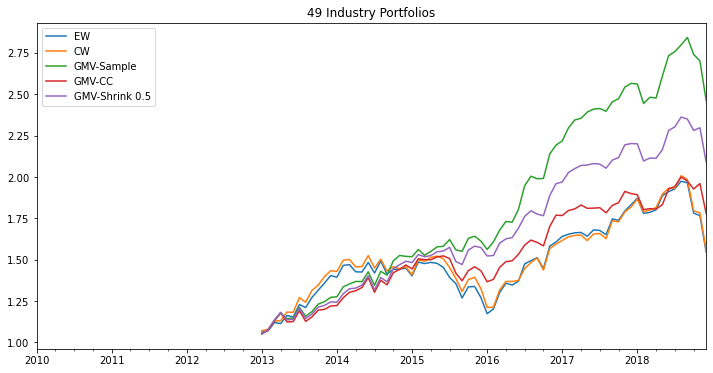

In [12]:
mv_sh_r = tlk.backtest_ws(ind_rets, estimation_window=36, weighting=tlk.weight_gmv, cov_estimator=tlk.shrinkage_cov, delta=0.5)
mv_s_r = tlk.backtest_ws(ind_rets, estimation_window=36, weighting=tlk.weight_gmv, cov_estimator=tlk.sample_cov)
mv_cc_r = tlk.backtest_ws(ind_rets, estimation_window=36, weighting=tlk.weight_gmv, cov_estimator=tlk.cc_cov)
btr = pd.DataFrame({"EW": ewr, "CW": cwr, "GMV-Sample": mv_s_r, "GMV-CC": mv_cc_r, 'GMV-Shrink 0.5': mv_sh_r})
(1+btr).cumprod().plot(figsize=(12,6), title="49 Industry Portfolios")
tlk.summary_stats(btr.dropna())

In [13]:
inds = ['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other']
inds1=['Beer', 'Hlth', 'Fin','Rtail','Whlsl']
ind_rets = tlk.get_ind_returns(weighting="vw", n_inds=49)["2010":]
ind_mcap = tlk.get_ind_market_caps(49, weights=True)["2010":]

rets = ind_rets["2010":][inds1]
cov = rets.cov()

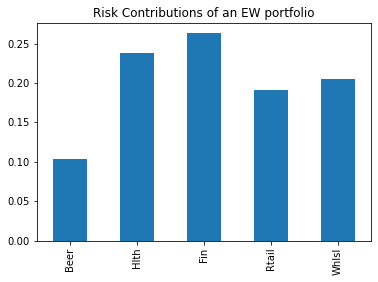

In [14]:
tlk.risk_contribution(tlk.weight_ew(rets), cov).plot.bar(title="Risk Contributions of an EW portfolio");

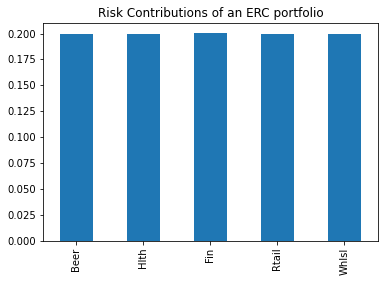

In [15]:
tlk.risk_contribution(tlk.equal_risk_contributions(cov), cov).plot.bar(title="Risk Contributions of an ERC portfolio");

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown,Wealth
EW,0.075322,0.139008,-0.566519,3.923880,0.064106,0.089681,0.317160,-0.216976,1546.08
CW,0.076336,0.141111,-0.618953,4.018791,0.065553,0.091542,0.319421,-0.225660,1554.85
GMV-Shrinkage,0.130738,0.104997,-0.675699,3.999876,0.043677,0.063916,0.933746,-0.115142,2090.12
ERC-Shrinkage,0.107151,0.111329,-0.633234,3.799946,0.048452,0.067942,0.674387,-0.139223,1841.80


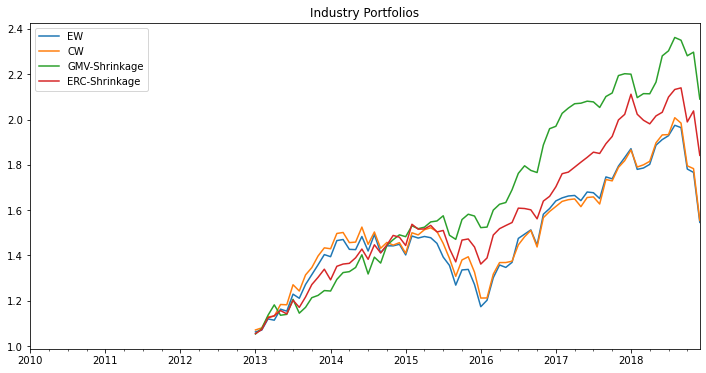

In [16]:
mv_erc_r = tlk.backtest_ws(ind_rets, estimation_window=36, weighting=tlk.weight_erc, cov_estimator=tlk.shrinkage_cov)
btr = pd.DataFrame({"EW": ewr, "CW": cwr, "GMV-Shrinkage":mv_sh_r,"ERC-Shrinkage": mv_erc_r})
(1+btr).cumprod().plot(figsize=(12,6), title="Industry Portfolios")
tlk.summary_stats(btr.dropna())

In [65]:
pd.DataFrame({
    "GMV_weights"   : tlk.weight_gmv(ind_rets, cov_estimator=tlk.shrinkage_cov).round(2),
    "ERC_weights"   : tlk.weight_erc(ind_rets).round(2),
    "Equal_weights" : tlk.weight_ew(ind_rets).round(2),
    "Cap_weights"   : tlk.weight_cw(ind_rets, cap_weights=ind_mcap).round(2)
})

,GMV_weights,ERC_weights,Equal_weights,Cap_weights
Agric,0.00,0.02,0.02,0.00
Food,0.13,0.04,0.02,0.02
Soda,0.00,0.04,0.02,0.00
Beer,0.14,0.04,0.02,0.02
Smoke,0.00,0.03,0.02,0.01
Toys,0.00,0.02,0.02,0.00
Fun,0.00,0.01,0.02,0.00
Books,0.00,0.02,0.02,0.00
Hshld,0.23,0.03,0.02,0.02
Clths,0.00,0.02,0.02,0.01


In [63]:
pd.DataFrame({
    "GMV_weights"   : tlk.weight_gmv(rets, cov_estimator=tlk.shrinkage_cov).round(2),
    "ERC_weights"   : tlk.weight_erc(rets).round(2),
    "Equal_weights" : tlk.weight_ew(rets).round(2),
    "Cap_weights"   : tlk.weight_cw(rets, cap_weights=ind_mcap[inds1]).round(2)
})

,GMV_weights,ERC_weights,Equal_weights,Cap_weights
Beer,0.68,0.31,0.2,0.15
Hlth,0.00,0.16,0.2,0.04
Fin,0.00,0.15,0.2,0.20
Rtail,0.14,0.19,0.2,0.52
Whlsl,0.19,0.18,0.2,0.09
